<a href="https://colab.research.google.com/github/ab-sa/Statistical-Machine-Learning-2/blob/main/Lecture10_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, GridSearchCV
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.base import BaseEstimator, ClassifierMixin
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.optimizers import SGD

In [23]:
Steel = pd.read_csv('SteelStock_monthly.csv')
Steel.head()

,month,year,day,price,Date,Ind
0,1,1386,1,1879.501993,2007-03-21,1
1,1,1387,1,3413.524091,2008-03-20,2
2,1,1388,1,1814.074534,2009-03-21,3
3,1,1389,1,2591.221577,2010-03-21,4
4,1,1390,1,2356.125452,2011-03-21,5


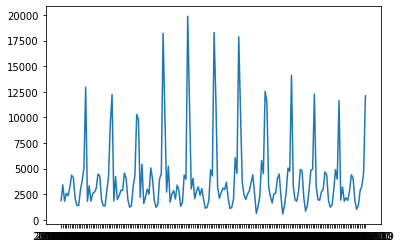

In [97]:
plt.plot(Steel['Date'], Steel['price'])
plt.show()

In [147]:
train = Steel[Steel['Ind'] <= 140]
test = Steel[Steel['Ind'] > 140]
train = train.iloc[:, 3:4].values
test = test.iloc[:, 3:4].values

sc = MinMaxScaler(feature_range = (0, 1))
train_scaled = sc.fit_transform(train)

time_step = 1

X_train = []
y_train = []
for i in range(time_step, 140):
    X_train.append(train_scaled[i-time_step:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(139, 1)
(139,)
(139, 1, 1)


In [148]:
regressor = Sequential()
regressor.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 0.0877
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0640
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0507
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0407
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0395
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0373
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0376
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0379
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0375
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0375
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0374
Epoch 13/100
5/5 [==============================] - 0s 3ms/st

In [149]:
dataset_total = Steel['price']
inputs = dataset_total[len(dataset_total) - len(test) - time_step :].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs
X_test = []
for i in range(time_step, 34):
    X_test.append(inputs[i-time_step:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
preds = regressor.predict(X_test)
preds_tf = sc.inverse_transform(preds[:,:,0])

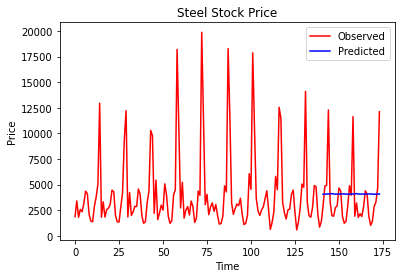

In [150]:
plt.plot(Steel['price'], color = 'red', label = 'Observed')
plt.plot(np.linspace(141,173,33), preds_tf, color = 'blue', label = 'Predicted')
plt.title('Steel Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()